In [ ]:
%%capture

from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))


using_colab = True
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    
    !mkdir images
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
    !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
        
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [35]:
image_path = 'hoes.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)


In [36]:
predictor = SamPredictor(sam)

predictor.set_image(image)

In [37]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
%%capture
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib ipympl

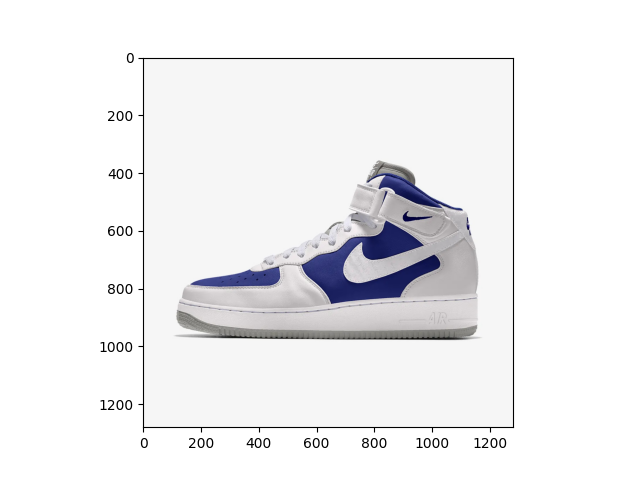

Clicked coordinates: [[352, 835]]
Labels: [1]
Clicked coordinates: [[352, 835], [881, 624]]
Labels: [1, 1]
Clicked coordinates: [[352, 835], [881, 624], [819, 385]]
Labels: [1, 1, 1]
Clicked coordinates: [[352, 835], [881, 624], [819, 385], [1016, 873]]
Labels: [1, 1, 1, 1]
Clicked coordinates: [[352, 835], [881, 624], [819, 385], [1016, 873], [303, 894]]
Labels: [1, 1, 1, 1, 1]
Clicked coordinates: [[352, 835], [881, 624], [819, 385], [1016, 873], [303, 894], [920, 482]]
Labels: [1, 1, 1, 1, 1, 1]
Clicked coordinates: [[352, 835], [881, 624], [819, 385], [1016, 873], [303, 894], [920, 482], [199, 606]]
Labels: [1, 1, 1, 1, 1, 1, 0]
Clicked coordinates: [[352, 835], [881, 624], [819, 385], [1016, 873], [303, 894], [920, 482], [199, 606], [532, 1150]]
Labels: [1, 1, 1, 1, 1, 1, 0, 0]


In [42]:

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

input_point = []
input_label = []

def onclick(event):
    ix, iy = event.xdata, event.ydata
    if event.button == 1:  # Left click
        label = 1
    elif event.button == 3:  # Right click
        label = 0
    else:
        return
    input_point.append([int(ix), int(iy)])
    input_label.append(label)
    print("Clicked coordinates:", input_point)
    print("Labels:", input_label)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Display an image
image = plt.imread(image_path)
ax.imshow(image)

plt.show()


In [43]:
input_point = np.array(input_point)
input_label = np.array(input_label)

In [44]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

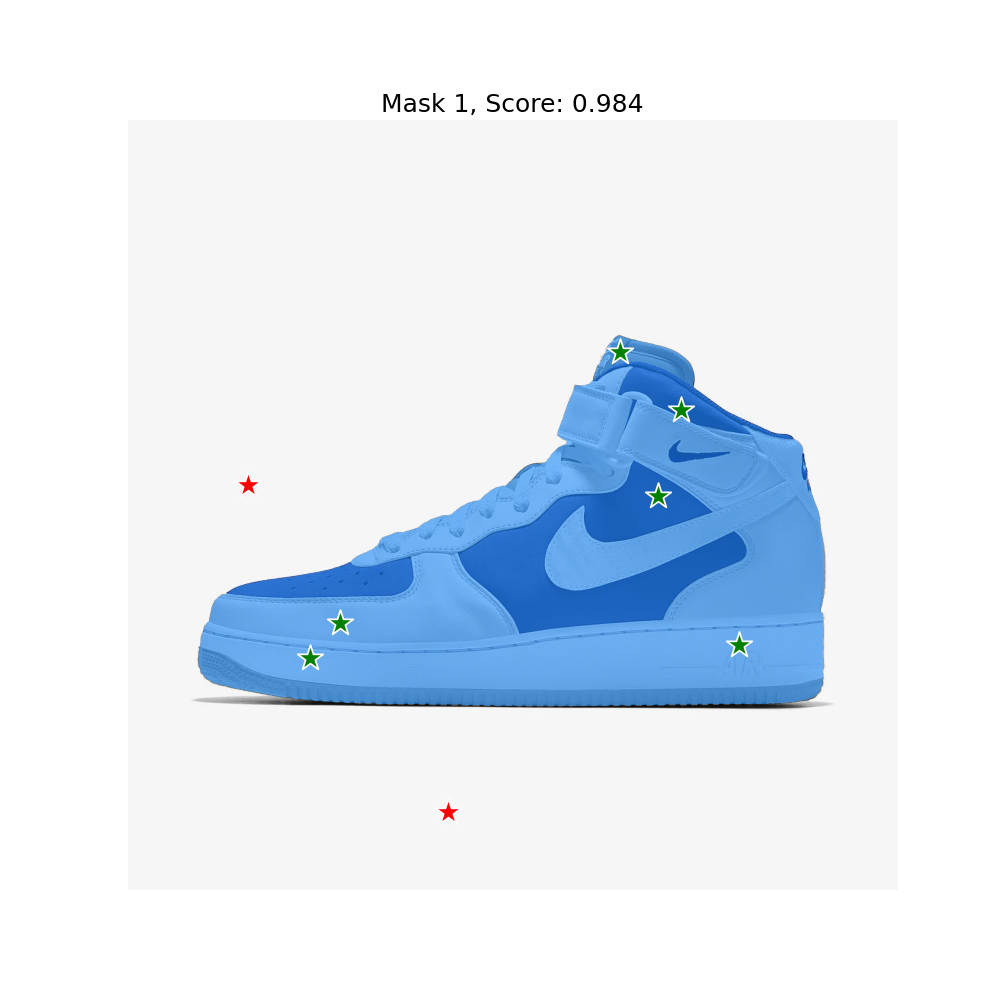

In [45]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  

In [ ]:
from PIL import Image
mask= Image.fromarray(mask)

mask.save('mask.jpg')